In [1]:
import pandas as pd
from matplotlib import pyplot as plt

import gffpandas.gffpandas as gffpd

import pandas as pd
from pandas.core.common import SettingWithCopyWarning
import gseapy as gp
import warnings

import numpy as np
from gseapy.plot import barplot, dotplot
from matplotlib import pyplot as plt 


warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
l = -np.log10(0.05)

def get_df(database, genelist, background):
    enr = gp.enrichr(gene_list=genelist ,
        gene_sets=database,
        background = background,  
        outdir=None,
        cutoff=0.5,                          
     )
    return enr

def plot(df, name):
    barplot(df,title= name, top_term=15, cutoff=0.05,color = 'r')
    plt.plot([l,l],[-1, 15], linestyle = '--',color='k', label = '- log10(0.05)')

In [6]:
#from statsmodels.sandbox.stats.multicomp import multipletests

path = '/Users/aleksandradenisova/Desktop/coursework/'
names = ['go_BP', 'go_MF', 'go_CC', 'go_reactome']
#proc = [go_BP, go_MF, go_CC, go_reactome]

for nim in range(4)[:1]:
    df = pd.read_csv(f'{path}data/final_data/permutations_n_terms_'+names[nim]+'_new2.csv', low_memory=False)
    df_T = df[df.columns[6:]].T

    df = df.sort_values(by = 'Adjusted P-value')
    df['less'] = (df_T <= df_T.iloc[0]).sum(axis=0)
    df['p_val_perm'] = df['less']/70

    df[['p_val_perm','less','Gene_set', 'Overlap', 'P-value', 'Odds Ratio', 'Genes', 'Term',
           'Adjusted P-value','2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
           '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
           '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35',
           '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47',
           '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59',
           '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
           ]].to_csv(f'{path}data/final_data/permutations_n_terms_'+names[nim]+'_perm.csv', index = False)

    name = names[nim]
# plot(df[df['p_val_perm']<=0.05], name)

In [8]:
df = pd.read_csv(f'{path}data/final_data/permutations_n_terms_'+names[nim]+'_perm.csv')
df.columns

Index(['p_val_perm', 'less', 'Gene_set', 'Overlap', 'P-value', 'Odds Ratio',
       'Genes', 'Term', 'Adjusted P-value', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68',
       '69', '70'],
      dtype='object')

In [15]:
df['69'] - df['2']

0     -0.387705
1     -0.649892
2     -0.447649
3     -0.830369
4     -0.317131
         ...   
252   -0.049015
253   -0.182806
254   -0.065673
255    0.220827
256   -0.194420
Length: 257, dtype: float64

In [10]:
df[['p_val_perm', 'less', 'Gene_set', 'Overlap', 'P-value', 'Odds Ratio',
       'Genes', 'Term', 'Adjusted P-value', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35']].head()

,p_val_perm,less,Gene_set,Overlap,P-value,Odds Ratio,Genes,Term,Adjusted P-value,2,...,26,27,28,29,30,31,32,33,34,35
0,0.014286,1,gs_ind_0,52/119,1.128076e-16,3.437125,ROBO1;ADGRL3;TENM1;OBSL1;PTPRF;NLGN1;PTPRD;BSG...,cell-cell adhesion via plasma-membrane adhesio...,5.568182e-13,0.656812,...,0.191214,0.500395,0.378467,0.000678,0.126629,0.078488,0.008486,0.110554,0.419089,2.477836e-03
1,0.014286,1,gs_ind_0,77/236,3.155378e-15,2.573248,NTSR1;PAFAH1B1;TBC1D24;GRID1;GABRG3;HRH2;SYN3;...,chemical synaptic transmission (GO:0007268),7.787472e-12,0.715107,...,0.030376,0.232380,0.601737,0.070181,0.085040,0.008230,0.306547,0.048327,0.269975,4.720470e-05
2,0.014286,1,gs_ind_0,98/364,5.264979e-13,2.125731,NR2C2;SH3GL3;ADGRB1;PPP2R5D;SCD5;SEMA5A;IL1RAP...,nervous system development (GO:0007399),8.292182e-10,0.536178,...,0.140766,0.245272,0.559551,0.033152,0.480061,0.383175,0.288751,0.431123,0.205383,7.725752e-05
3,0.014286,1,gs_ind_0,27/47,6.719759e-13,4.503495,ROBO1;OBSL1;BSG;DSCAML1;PECAM1;CDH13;PLXNB2;DS...,homophilic cell adhesion via plasma membrane a...,8.292182e-10,0.895894,...,0.274401,0.273075,0.369416,0.001305,0.033968,0.008052,0.064017,0.051336,0.287283,4.742570e-04
4,0.057143,4,gs_ind_0,61/185,1.385752e-12,2.594328,ROBO1;EPHB6;CHN1;SLIT3;EPHB2;BSG;DSCAML1;NRXN3...,axon guidance (GO:0007411),1.140012e-09,0.320824,...,0.042481,0.180181,0.601737,0.000657,0.085040,0.025884,0.050360,0.012918,0.073253,2.630358e-07


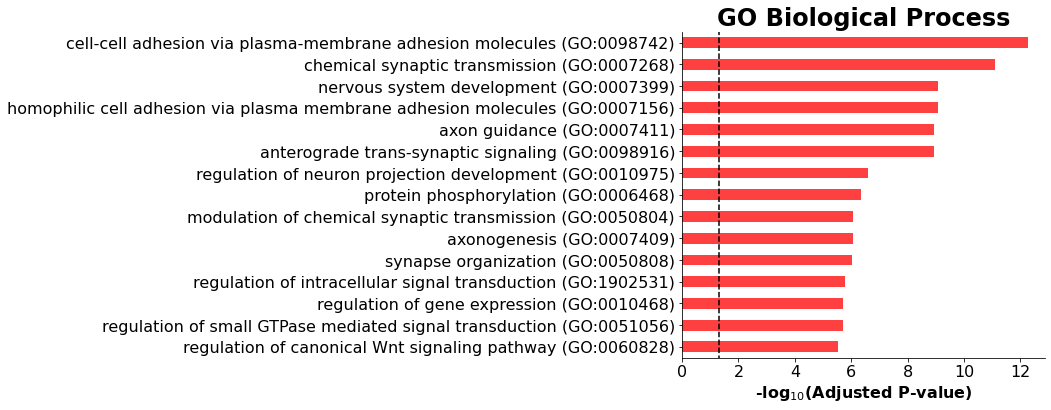

In [22]:
plot(df, 'GO Biological Process')

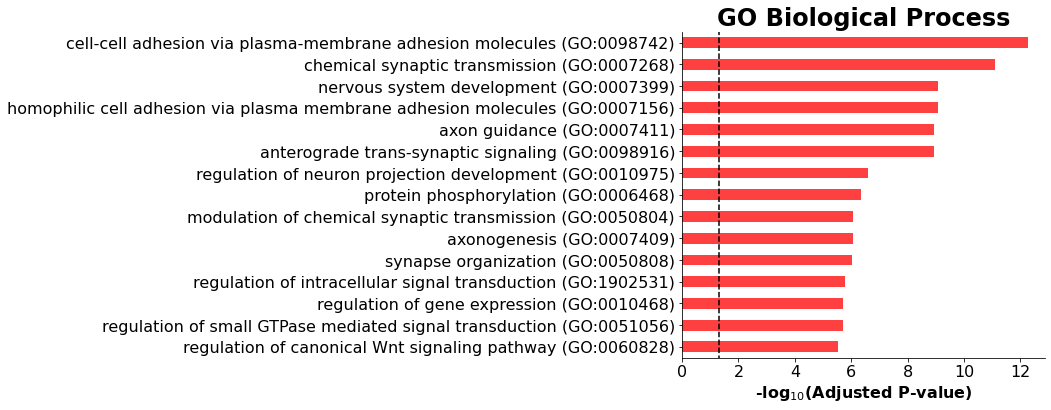

In [26]:
plot(df[df['p_val_perm']<=0.5], 'GO Biological Process')